<a href="https://colab.research.google.com/github/OluwatodimuAdegoke/ComputerVisionCourse/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf # Models
import pandas as pd  # Reading and processing data
import seaborn as sns # Visualization
import numpy as np
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError

Data Preparation

In [2]:
# Read the data
data = pd.read_csv("train.csv",sep=',')
data.shape
# Plots the graphs of each variable against the other
# sns.pairplot(data[['years','km','rating','condition','economy','top speed','hp', 'torque','current price']])

(1000, 12)

In [3]:
tensor_data = tf.constant(data)
# Cast to float32
tensor_data = tf.cast(tensor_data,tf.float32)
# Shuffle the data to avoid bias
tensor_data = tf.random.shuffle(tensor_data)


In [4]:
x = tensor_data[:,3:-1]
print(x.shape)
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis = -1)
print(y.shape)

(1000, 8)
(1000, 1)


In [61]:
#Divide the dataset into training, validation and testing data
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)


In [62]:
x_train = x[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)

(800, 8)


In [71]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [72]:
x_val = x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)

x_test = x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape)

(100, 8)
(100, 8)


In [74]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


In [64]:
# Normalize the input
normalizer = Normalization()
# Gets the mean and std itself
normalizer.adapt(x_train)
normalizer(x_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.3451495 , -1.1255285 , -1.4195638 , -1.614912  ,  1.0933096 ,
        -0.10946778,  1.6782013 ,  0.81605536],
       [-0.9326389 , -0.52780145,  1.4231169 , -1.614912  ,  0.64315695,
        -1.0466572 ,  0.4715137 ,  0.48526224],
       [-1.5201283 ,  0.47419474,  1.4231169 , -1.2592045 , -0.70730114,
         0.46325907,  0.5680487 , -1.6412652 ],
       [ 1.4173186 ,  0.8737747 , -1.4195638 , -1.614912  , -1.6076065 ,
        -1.0466572 ,  0.6163162 ,  0.7215431 ],
       [-1.5201283 ,  0.34149203, -1.4195638 , -0.90349704, -1.1574538 ,
         0.6194573 , -1.3626515 ,  0.76879925]], dtype=float32)>

In [65]:
# Create a model with keras
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(1)])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


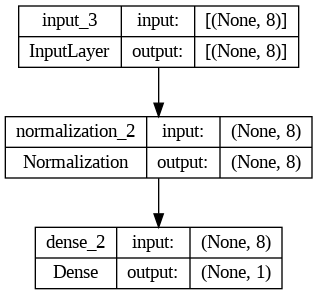

In [66]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

In [67]:
# Uses the mean square error. Can also use the mean absolute error
# Use mean absolute error when there is a outlier that'll affect the data
# Can also use Huber loss
model.compile(optimizer=Adam(learning_rate = 0.1),
              loss=MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [75]:
# Training the model
#
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=100,
                    verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 306560.1875 - root_mean_squared_error: 331583.6875 - val_loss: 306558.7812 - val_root_mean_squared_error: 331582.4375
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 306557.5938 - root_mean_squared_error: 331581.3438 - val_loss: 306556.2812 - val_root_mean_squared_error: 331580.1250
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 306555.1250 - root_mean_squared_error: 331579.0000 - val_loss: 306553.7812 - val_root_mean_squared_error: 331577.8125
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 306552.6250 - root_mean_squared_error: 331576.7188 - val_loss: 306551.2812 - val_root_mean_squared_error: 331575.5000
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 306550.1562 - root_mean_squared_error: 331574.4062 - val_loss: 306548.7812 - val_root_mean_squared_error: 331573.1875
Epoch 6/100
25/25 [=========================

<function matplotlib.pyplot.show(close=None, block=None)>

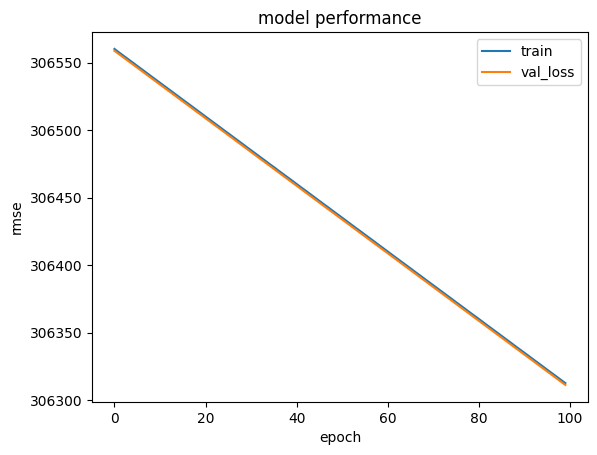

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show

In [77]:
# Evaluate the model
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 313523.9375 - root_mean_squared_error: 336208.5625


[313523.9375, 336208.5625]

In [78]:
model.predict(tf.expand_dims(x_test[0],axis = 0))


1/1 [==============================] - 0s 81ms/step


array([[246.79996]], dtype=float32)

In [79]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(x_test)[:,0])


4/4 [==============================] - 0s 3ms/step


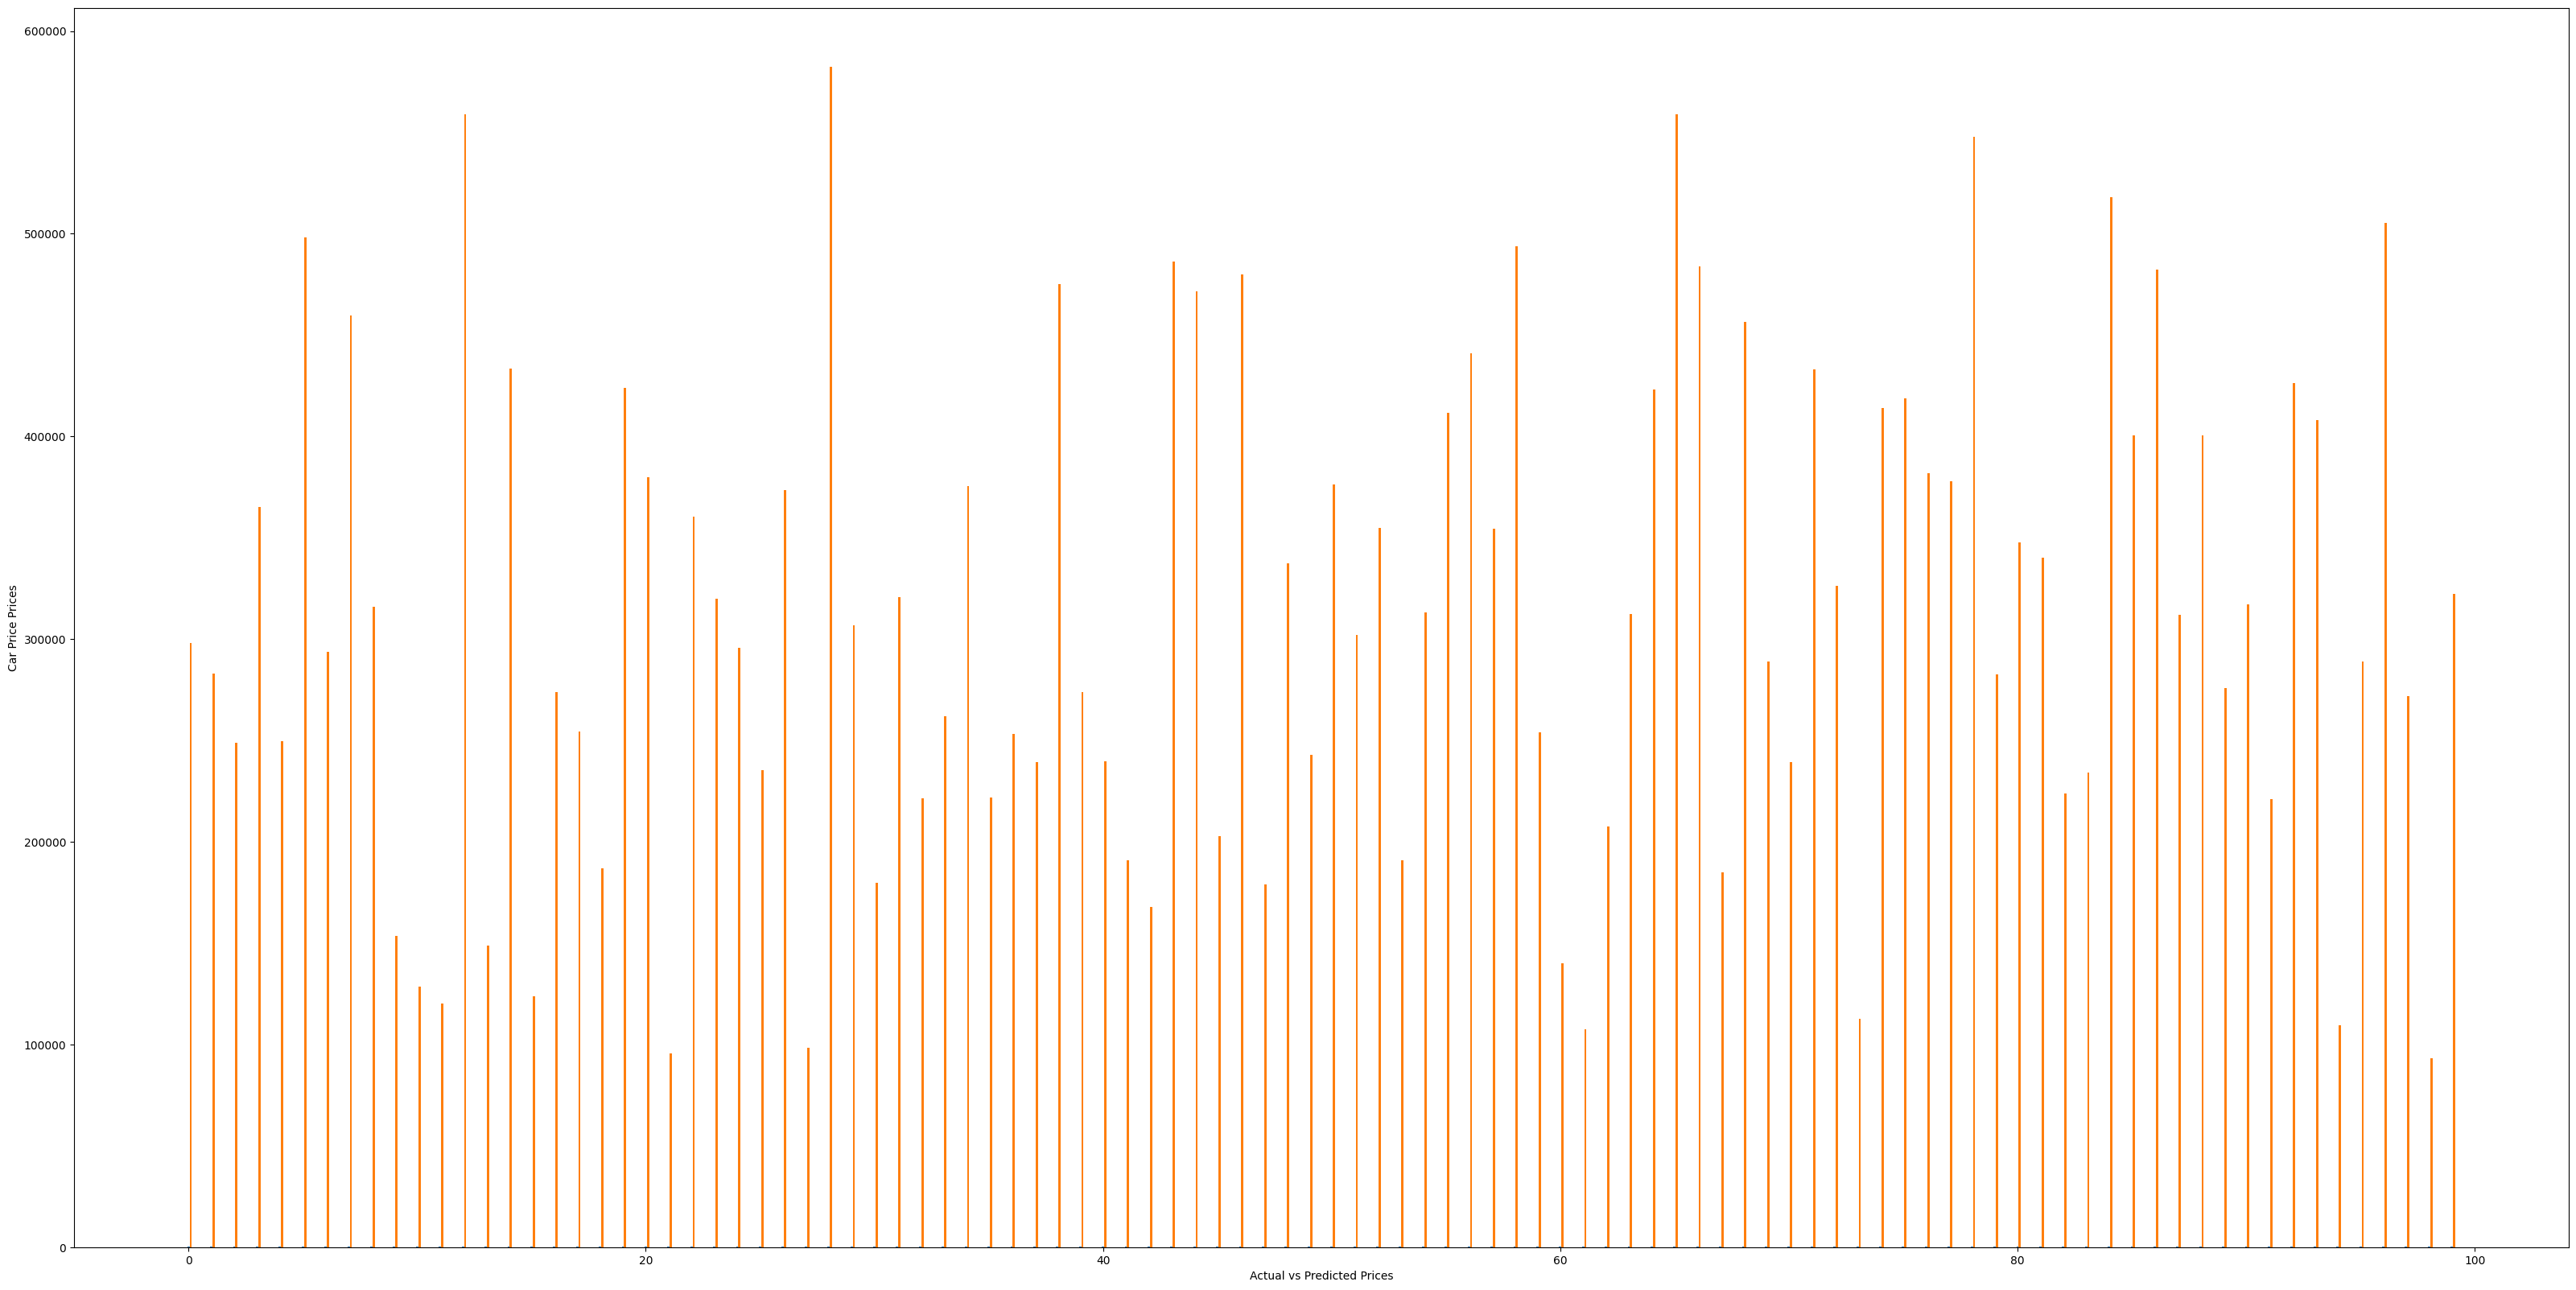

In [82]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()